<a href="https://colab.research.google.com/github/qazjean/practicum/blob/main/pupupu%D0%BB%D0%BA%D1%80%D1%82%D1%83%D0%B4%D1%86%D0%BE%D0%BB%D0%B2%D0%B0%D0%B2%D0%B8%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2 Парсинг


### **Теоретический материал к Лабораторной работе №2**

**Тема: Основы автоматизированного сбора данных из веб-источников**

#### **Введение: от веб-страницы к структурированным данным**

Современный Интернет представляет собой крупнейший в истории человечества источник информации. Однако эти данные, как правило, представлены в неструктурированном, человекочитаемом формате — в виде веб-страниц. Процесс автоматического извлечения данных с веб-сайтов и их преобразования в структурированный, машиночитаемый вид (например, в таблицу или базу данных) получил название **веб-парсинг** (от англ. *to parse* — анализировать, разбирать) или **веб-скрейпинг** (*to scrape* — соскребать).

Для выполнения этой задачи мы будем использовать экосистему из нескольких специализированных библиотек Python, каждая из которых выполняет свою строго определенную функцию. В данной работе мы сосредоточимся на двух основных инструментах для работы со статичными сайтами.

---

#### **1. Библиотека `requests`: Протокол взаимодействия с веб-сервером**

Любое взаимодействие в сети Интернет начинается с отправки запроса. Когда вы вводите адрес сайта в браузере, он отправляет HTTP-запрос к серверу, на котором этот сайт расположен. Сервер в ответ присылает HTML-документ, который браузер и отображает.

Библиотека `requests` является отраслевым стандартом в Python для выполнения этой задачи программным путем. Её основная функция — абстрагироваться от сложностей сетевых протоколов и предоставить простой интерфейс для отправки HTTP-запросов.

**Ключевые концепции и синтаксис:**

1.  **Отправка GET-запроса:** Основной метод, который мы используем, — `requests.get()`. Он эмулирует переход по URL-адресу в браузере.

    ```python
    import requests

    # URL-адрес целевого ресурса
    url = 'http://quotes.toscrape.com/'

    # Отправка запроса. Вся информация об ответе сервера будет храниться в объекте 'response'
    response = requests.get(url)
    ```

2.  **Объект ответа (`response`):** Результатом вызова `requests.get()` является объект, содержащий всю информацию об ответе сервера. Наиболее важные для нас атрибуты:
    *   `response.status_code`: Числовой код состояния HTTP. Успешный запрос возвращает код **200**. Коды, начинающиеся с 4 (например, 404 Not Found) или 5 (например, 500 Internal Server Error), свидетельствуют об ошибках. Проверка этого кода — обязательный шаг для написания надежного парсера.
    *   `response.text`: Содержимое ответа сервера в виде текстовой строки. В нашем случае это будет полный HTML-код запрошенной страницы.

    **Пример использования:**

    ```python
    if response.status_code == 200:
        print("Запрос выполнен успешно.")
        # Получаем HTML-код страницы
        html_content = response.text
        print("Длина полученного HTML-документа:", len(html_content), "символов.")
    else:
        print("Произошла ошибка при запросе. Код:", response.status_code)
    ```

На данном этапе `requests` свою задачу выполнил: мы получили "сырой" HTML-документ. Далее его необходимо проанализировать.

---

#### **2. Библиотека `BeautifulSoup`: Навигация по DOM-структуре документа**

HTML-документ — это не просто текст, а строго иерархическая структура, описываемая с помощью тегов. Эту структуру принято называть **DOM-деревом** (Document Object Model). Библиотека `BeautifulSoup` является мощнейшим инструментом для парсинга этого дерева. Она преобразует текстовую строку HTML в объектную модель, по которой можно осуществлять удобную навигацию и поиск.

**Ключевые концепции и синтаксис:**

1.  **Инициализация объекта ("создание супа"):** Первым шагом является создание экземпляра класса `BeautifulSoup`, который принимает на вход HTML-текст и название парсера.

    ```python
    from bs4 import BeautifulSoup

    # html_content - это строка, полученная от requests.text
    soup = BeautifulSoup(html_content, 'html.parser')
    ```

2.  **Поиск элементов:** `BeautifulSoup` предоставляет два основных метода для поиска тегов внутри DOM-дерева. Они используют **селекторы** — комбинации имени тега и его атрибутов (например, `class` или `id`).

    *   **`soup.find(tag, attributes)`**: Ищет **первый** элемент, соответствующий заданным критериям, и возвращает его как объект тега. Если ничего не найдено, возвращает `None`.

      **Синтаксис:**
      ```python
      # Поиск первого тега <h1>
      first_h1 = soup.find('h1')

      # Поиск первого тега <span> с атрибутом class='text'
      # ВАЖНО: 'class' - зарезервированное слово в Python, поэтому используется аргумент 'class_'
      first_quote_text = soup.find('span', class_='text')
      ```

    *   **`soup.find_all(tag, attributes)`**: Ищет **все** элементы, соответствующие критериям, и возвращает их в виде списка (`list`). Если ничего не найдено, возвращает пустой список.

      **Синтаксис:**
      ```python
      # Поиск всех тегов <div> с атрибутом class='quote'
      all_quote_containers = soup.find_all('div', class_='quote')

      # Итерация по результатам
      for container in all_quote_containers:
          # Внутри каждого найденного контейнера можно продолжать поиск
          author = container.find('small', class_='author')
          print(author.text)
      ```

3.  **Извлечение содержимого из найденных тегов:** После того как тег найден, из него можно извлечь полезную информацию.
    *   **`.text`**: Возвращает все текстовое содержимое внутри тега и его дочерних элементов в виде одной строки.
    *   **`tag['attribute_name']`**: Позволяет получить значение конкретного атрибута тега. Чаще всего используется для извлечения ссылок из атрибута `href` у тега `<a>`.

      **Пример использования:**
      ```python
      # Найдем тег с цитатой
      quote_element = soup.find('div', class_='quote')

      # Извлекаем текст цитаты
      text = quote_element.find('span', class_='text').text
      print("Текст цитаты:", text)

      # Извлекаем ссылку на автора (если она есть)
      author_link = quote_element.find('a') # Находим первый тег <a> внутри контейнера
      if author_link:
          href_value = author_link['href']
          print("Ссылка на страницу автора:", href_value)
      ```



Рассмотренный ранее подход с использованием библиотек `requests` и `BeautifulSoup` является высокоэффективным для работы со **статичными** веб-страницами. "Статичная" страница — это документ, HTML-код которого полностью формируется на сервере и доставляется клиенту в готовом виде. Однако значительная часть современного веба функционирует иначе.

**Динамические веб-сайты** активно используют технологию JavaScript для модификации своего содержимого непосредственно в браузере пользователя *после* первоначальной загрузки страницы. Это может быть подгрузка новостной ленты при прокрутке, отображение цен на авиабилеты после выбора маршрута, обновление графика погоды в реальном времени.

При попытке парсинга таких сайтов с помощью `requests`, мы получим лишь базовый HTML-шаблон, в котором искомые данные будут отсутствовать, поскольку JavaScript-код, ответственный за их загрузку и отображение, не будет исполнен.

Для решения этой фундаментальной проблемы необходим инструмент, который не просто запрашивает HTML, а эмулирует поведение полноценного веб-браузера. Таким инструментом является библиотека **Selenium**.

---

#### **1. Парадигма Selenium: Управление браузером вместо отправки запросов**

Основное отличие Selenium от `requests` заключается в подходе. Если `requests` — это "курьер", доставляющий HTML-документ, то **Selenium — это "робот-пользователь"**, который программно запускает и управляет реальным браузером (Google Chrome, Firefox и др.).

Этот подход позволяет:
*   **Исполнять JavaScript:** Браузер под управлением Selenium загружает и выполняет все скрипты на странице.
*   **Взаимодействовать с элементами:** Selenium может эмулировать действия пользователя, такие как клики по кнопкам, ввод текста в поля, прокрутку страницы.
*   **Работать с итоговым HTML:** После всех динамических модификаций мы получаем доступ к финальному, "отрисованному" DOM-дереву, которое и видит пользователь.

---

#### **2. Ключевые компоненты и синтаксис Selenium**

##### **2.1. WebDriver: Мост между кодом и браузером**

Центральным элементом Selenium является **WebDriver**. Это программный интерфейс (API), который выступает в роли "драйвера" или "переводчика" между командами в вашем Python-скрипте и действиями в реальном приложении браузера.

**Инициализация WebDriver:**
Для начала работы необходимо создать экземпляр WebDriver для конкретного браузера. Современные версии Selenium (`4.6.0` и новее) автоматически управляют загрузкой необходимого драйвера.

```python
from selenium import webdriver

# Инициализация драйвера для Google Chrome.
# Selenium сам скачает и настроит chromedriver.
driver = webdriver.Chrome()

# Команда ниже откроет окно браузера Chrome
```

##### **2.2. Навигация и получение страницы**
Основной метод для загрузки страницы — `driver.get(url)`.

```python
url = 'https://www.gismeteo.ru/weather-moscow-4368/'
driver.get(url) # Браузер откроется и перейдет по указанному адресу
```

##### **2.3. Проблема асинхронности и механизмы ожидания**

Это **самая важная и сложная концепция** при работе с Selenium. Ваш Python-скрипт выполняется гораздо быстрее, чем браузер успевает загрузить страницу и выполнить все JavaScript-команды. Если вы попытаетесь найти элемент сразу после вызова `driver.get()`, скорее всего, вы получите ошибку `NoSuchElementException`, потому что элемент еще не появился на странице.

**Неправильный подход:** `time.sleep(5)`. Использование жестких пауз — плохая практика. Пауза может быть слишком короткой (данные не успеют загрузиться) или слишком длинной (скрипт будет работать неэффективно).

**Правильный подход: Явные ожидания (Explicit Waits)**
Это механизм, который заставляет WebDriver ждать наступления определенного события (например, появления элемента) в течение заданного максимального времени.

**Синтаксис:**
```python
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Создаем объект ожидания: ждать максимум 10 секунд
wait = WebDriverWait(driver, 10)

# Команда "ждать, пока элемент с указанным локатором не станет присутствовать в DOM"
# By.CLASS_NAME — это способ поиска (локатор)
# 'unit_temperature_c' — значение локатора
temperature_element = wait.until(
    EC.presence_of_element_located((By.CLASS_NAME, 'unit_temperature_c'))
)
```

##### **2.4. Поиск элементов и взаимодействие с ними**

Для поиска элементов Selenium использует **локаторы**, которые указывают, *как* именно искать элемент. Они импортируются из `selenium.webdriver.common.by.By`.

Основные локаторы:
*   `By.ID`
*   `By.CLASS_NAME`
*   `By.TAG_NAME`
*   `By.XPATH` (самый мощный и сложный)
*   `By.CSS_SELECTOR` (часто самый удобный)

**Методы поиска:**
*   `driver.find_element(By.ЛОКАТОР, 'значение')`: Ищет **первый** элемент.
*   `driver.find_elements(By.ЛОКАТОР, 'значение')`: Ищет **все** элементы и возвращает список.

**Методы взаимодействия:**
*   `.click()`: Кликнуть по элементу.
*   `.send_keys('текст')`: Ввести текст в поле ввода.
*   `.text`: Получить видимый текст элемента.
*   `.get_attribute('атрибут')`: Получить значение атрибута (например, `href`).

**Пример:**
```python
# Найти поле поиска по его ID
search_box = driver.find_element(By.ID, 'search-input')

# Ввести текст в поле
search_box.send_keys('Погода в Санкт-Петербурге')

# Найти и кликнуть по кнопке поиска
search_button = driver.find_element(By.CLASS_NAME, 'search-button')
search_button.click()
```

##### **2.5. Интеграция с BeautifulSoup и завершение работы**

После того как Selenium выполнил все необходимые действия (клики, прокрутку) и дождался появления данных, мы можем получить итоговый HTML-код страницы.

*   `driver.page_source`: Атрибут, содержащий финальный HTML-код страницы в виде строки.

Этот код можно передать в `BeautifulSoup` для более удобного и быстрого парсинга, комбинируя сильные стороны обеих библиотек.

**Обязательный шаг: Завершение сессии**
После окончания работы необходимо закрыть браузер и завершить сессию WebDriver, чтобы освободить системные ресурсы.

*   `driver.quit()`: Закрывает все окна браузера и завершает процесс WebDriver.




### Requests

In [ ]:
import requests
import json # Библиотека для работы с JSON

# --- ШАГ 1: Определение цели ---
# URL API для получения репозиториев пользователя.
# Обратите внимание, что это не обычный URL для браузера!
api_base_url = "https://api.github.com/users/"
username = "gvanrossum"
full_api_url = f"{api_base_url}{username}/repos"

# --- ШАГ 2: Использование параметров запроса (params) ---
# API позволяет настраивать вывод. Мы хотим отсортировать репозитории
# по дате создания ('created') и получать по 10 штук за раз.
# Для этого используются GET-параметры, которые requests умеет добавлять к URL.

# --- ЗАДАНИЕ ---
# Создайте словарь 'params', который будет содержать следующие GET-параметры:
# 1. 'sort': со значением 'created' (сортировка по дате создания)
# 2. 'per_page': со значением '10' (выводить по 10 репозиториев на странице)
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
params = {
    'sort': 'created',
    'per_page': '10'
}
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲


# --- ШАГ 3: Выполнение запроса и обработка JSON ---
print(f"Отправляю запрос на: {full_api_url}")
response = requests.get(full_api_url, params=params)

if response.status_code == 200:
    print("Запрос успешен!")
    # --- ЗАДАНИЕ ---
    # Ответ от API приходит в формате JSON.
    # У объекта response есть специальный метод .json(), который
    # автоматически преобразует этот ответ в python-объект (список словарей).
    # Используйте его и сохраните результат в переменную 'repos_data'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    repos_data = response.json()
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ШАГ 4: Вывод результатов ---
    print(f"Последние 10 созданных репозиториев пользователя {username}:")
    # Пройдемся циклом по списку репозиториев и выведем их названия и URL
    for repo in repos_data:
        print(f"  - Название: {repo['name']}, URL: {repo['html_url']}")

else:
    print(f"Ошибка! Статус-код: {response.status_code}")
    print(f"Сообщение: {response.text}")

Отправляю запрос на: https://api.github.com/users/gvanrossum/repos
Запрос успешен!
Последние 10 созданных репозиториев пользователя gvanrossum:
  - Название: TypeChat, URL: https://github.com/gvanrossum/TypeChat
  - Название: devguide, URL: https://github.com/gvanrossum/devguide
  - Название: c-parser, URL: https://github.com/gvanrossum/c-parser
  - Название: old-demos, URL: https://github.com/gvanrossum/old-demos
  - Название: minithesis, URL: https://github.com/gvanrossum/minithesis
  - Название: exceptiongroup, URL: https://github.com/gvanrossum/exceptiongroup
  - Название: http-get-perf, URL: https://github.com/gvanrossum/http-get-perf
  - Название: pythonlabs-com-azure, URL: https://github.com/gvanrossum/pythonlabs-com-azure
  - Название: peps, URL: https://github.com/gvanrossum/peps
  - Название: patma, URL: https://github.com/gvanrossum/patma


Найден абсолютный URL логотипа: https://www.python.org/static/img/python-logo.png
Скачиваю изображение...
Изображение успешно скачано!
Файл 'logo.png' сохранен в текущую директорию Colab.


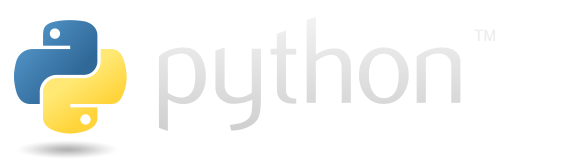

In [ ]:
#взят другой сайт, тк на вашем нет картинок, это доказано в окошке ниже
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image # Для отображения картинки в Colab

# --- ШАГ 1: Найти URL изображения ---
# Сначала нам нужно, как в прошлой лабораторной, найти ссылку на логотип.
base_url = 'https://www.python.org/'
response = requests.get(base_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Логотип находится в теге <img> внутри тега <a> с href="/".
# --- ЗАДАНИЕ ---
# Найдите тег 'img' и извлеките из него значение атрибута 'src'.
# Сохраните относительный URL в переменную 'relative_logo_url'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
logo_element = soup.find('img', class_='python-logo')
relative_logo_url = logo_element['src']
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

# --- ШАГ 2: Преобразование относительного URL в абсолютный ---
# Ссылка в 'src' относительная ('/images/logo.png').
# Чтобы ее скачать, нужен полный URL.
absolute_logo_url = urljoin(base_url, relative_logo_url)
print(f"Найден абсолютный URL логотипа: {absolute_logo_url}")


# --- ШАГ 3: Скачивание бинарного контента ---
print("Скачиваю изображение...")
# --- ЗАДАНИЕ ---
# Отправьте GET-запрос на 'absolute_logo_url'.
# Ответ для бинарных файлов нужно получать через атрибут .content, а не .text
# Сохраните результат в переменную 'image_content'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
image_response = requests.get(absolute_logo_url)
if image_response.status_code == 200:
    image_content = image_response.content
    print("Изображение успешно скачано!")
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ШАГ 4: Сохранение файла на диск ---
    # Используем стандартный синтаксис Python для записи файлов.
    # 'wb' означает "write binary" - запись в бинарном режиме.
    file_name = 'logo.png'
    # --- ЗАДАНИЕ ---
    # Откройте файл 'file_name' для записи в бинарном режиме ('wb')
    # и запишите в него 'image_content'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    with open(file_name, 'wb') as f:
        f.write(image_content)
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲
    print(f"Файл '{file_name}' сохранен в текущую директорию Colab.")

    # Отобразим скачанное изображение прямо в блокноте
    display(Image(file_name))
else:
    print(f"Ошибка при скачивании изображения! Статус-код: {image_response.status_code}")

In [ ]:
import requests
from bs4 import BeautifulSoup

base_url = 'http://quotes.toscrape.com/'
response = requests.get(base_url)
soup = BeautifulSoup(response.text, 'html.parser')

print("ДИАГНОСТИКА СТРУКТУРЫ САЙТА, тк в первой попытке решить задание у меня кое-что не сходилось")

# 1. Проверим, есть ли вообще ссылки с href='/'
main_links = soup.find_all('a', href='/')
print(f"Найдено ссылок с href='/': {len(main_links)}")
for i, link in enumerate(main_links):
    print(f"Ссылка {i+1}: {link}")

# 2. Посмотрим все изображения на странице
all_images = soup.find_all('img')
print(f"\nВсе изображения на странице ({len(all_images)}):")
for img in all_images:
    print(f"  - {img}")

# 3. Посмотрим всю структуру заголовка (где обычно находится логотип)
header = soup.find('header') or soup.find('div', class_=lambda x: x and 'header' in x) or soup.find('nav')
if header:
    print(f"\nСодержимое заголовка: {header.prettify()[:500]}...")

ДИАГНОСТИКА СТРУКТУРЫ САЙТА, тк в первой попытке решить задание у меня кое-что не сходилось
Найдено ссылок с href='/': 1
Ссылка 1: <a href="/" style="text-decoration: none">Quotes to Scrape</a>

Все изображения на странице (0):

Содержимое заголовка: <div class="row header-box">
 <div class="col-md-8">
  <h1>
   <a href="/" style="text-decoration: none">
    Quotes to Scrape
   </a>
  </h1>
 </div>
 <div class="col-md-4">
  <p>
   <a href="/login">
    Login
   </a>
  </p>
 </div>
</div>
...


In [ ]:
import requests
from bs4 import BeautifulSoup

# --- ШАГ 1: Создание сессии и получение CSRF-токена ---
# requests.Session() - это объект, который будет "помнить" cookies между запросами.
# --- ЗАДАНИЕ ---
# Создайте объект сессии и сохраните его в переменную 'session'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
session = requests.Session()
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

login_url = 'http://quotes.toscrape.com/login'

# Сначала делаем GET-запрос, чтобы получить страницу входа и специальный
# "csrf_token" - это защита от межсайтовой подделки запроса.
response_login_page = session.get(login_url)
soup_login = BeautifulSoup(response_login_page.text, 'html.parser')

# --- ЗАДАНИЕ ---
# Найдите тег 'input' у которого атрибут name равен 'csrf_token'
# и извлеките из него значение атрибута 'value'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
csrf_token = soup_login.find('input', {'name': 'csrf_token'})['value']
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

print(f"Получен CSRF токен: {csrf_token}")


# --- ШАГ 2: Подготовка данных для POST-запроса ---
# Это данные, которые мы бы ввели в форму на сайте.
# Имена полей ('username', 'password') нужно посмотреть в HTML-коде страницы.
payload = {
    'csrf_token': csrf_token,
    'username': 'admin',  # Используем стандартные учетные данные для этого сайта
    'password': 'admin'
}


# --- ШАГ 3: Отправка POST-запроса для аутентификации ---
# Мы отправляем POST-запрос на тот же URL, но уже с нашими данными.
# Сессия автоматически сохранит cookies, которые вернет сервер после успешного входа.
# --- ЗАДАНИЕ ---
# Отправьте POST-запрос с помощью объекта 'session'.
# URL: login_url
# Данные: payload
# Сохраните ответ в 'response_post'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
response_post = session.post(login_url, data=payload)
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲


# --- ШАГ 4: Доступ к защищенной странице ---
# Теперь, используя ту же сессию, мы можем зайти на любую страницу сайта,
# и сервер будет "видеть" нас как залогиненного пользователя.
print("\nПробую получить доступ к главной странице после логина...")
response_main_page = session.get('http://quotes.toscrape.com/')
soup_main = BeautifulSoup(response_main_page.text, 'html.parser')

# Проверим, видим ли мы кнопку "Logout"
logout_button = soup_main.find('a', href='/logout')

if logout_button:
    print("Успех! Мы авторизованы. Сервер видит кнопку 'Logout'.")
    print(logout_button.text)
else:
    print("Неудача. Авторизация не удалась, кнопка 'Logout' не найдена.")

Получен CSRF токен: PAiBqzYlZoFSwpvehXTCtnbRHjVgEJfmuOMDscWNUxGyQdKrLkaI

Пробую получить доступ к главной странице после логина...
Успех! Мы авторизованы. Сервер видит кнопку 'Logout'.
Logout


### BeautifulSoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# --- ШАГ 1: Получение HTML ---
url = 'http://books.toscrape.com/'
response = requests.get(url)
response.encoding = 'utf-8'
soup = BeautifulSoup(response.text, 'html.parser')

# --- ШАГ 2: Поиск общего контейнера ---
# Все книги находятся внутри элементов <article> с классом 'product_pod'.
# --- ЗАДАНИЕ ---
# Найдите ВСЕ такие контейнеры с помощью .find_all() и сохраните в 'all_books'.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
all_books = soup.find_all('article', class_='product_pod')
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

print(f"Найдено книг на странице: {len(all_books)}")
books_data = []

# --- ШАГ 3: Извлечение данных в цикле ---
for book in all_books:
    # --- ЗАДАНИЕ A: Найти название книги ---
    # Название находится в теге <a> внутри тега <h3>.
    # Нужно извлечь его атрибут 'title'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    title = book.find('h3').find('a')['title']
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ЗАДАНИЕ B: Найти цену ---
    # Цена находится в теге <p> с классом 'price_color'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    price = book.find('p', class_='price_color').text
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ЗАДАНИЕ C: Найти рейтинг ---
    # Рейтинг находится в атрибуте 'class' у тега <p>, который начинается с 'star-rating'.
    # Например: <p class="star-rating Three">. Нам нужно извлечь слово 'Three'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    rating_container = book.find('p', class_='star-rating')
    # Атрибут 'class' возвращает список классов, например, ['star-rating', 'Three']
    rating = rating_container['class'][1] # Берем второй элемент
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # Добавляем собранные данные в наш список
    books_data.append({
        'Title': title,
        'Price': price,
        'Rating': rating
    })

# --- ШАГ 4: Вывод результата ---
df = pd.DataFrame(books_data)
display(df)

Найдено книг на странице: 20


,Title,Price,Rating
0,A Light in the Attic,£51.77,Three
1,Tipping the Velvet,£53.74,One
2,Soumission,£50.10,One
3,Sharp Objects,£47.82,Four
4,Sapiens: A Brief History of Humankind,£54.23,Five
5,The Requiem Red,£22.65,One
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,The Black Maria,£52.15,One


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Добавляем заголовки, чтобы избежать блокировки
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

url = 'https://ru.wikipedia.org/wiki/Python'

try:
    response = requests.get(url, headers=headers, timeout=10)

    if response.status_code != 200:
        print(f"Ошибка загрузки страницы: {response.status_code}")
    else:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Ищем инфобокс - на русской Wikipedia обычно класс 'infobox'
        infobox = soup.find('table', class_='infobox')

        if not infobox:
            # Пробуем альтернативные варианты
            infobox = soup.find('table', class_ = 'infobox-software')

        if infobox:
            rows = infobox.find_all('tr')
            infobox_data = []

            for row in rows:
                header = row.find('th')
                data_cell = row.find('td')

                if header and data_cell:
                    key = header.text.strip()
                    value = data_cell.text.strip()

                    infobox_data.append({
                        'Характеристика': key,
                        'Значение': value
                    })

            if infobox_data:
                df = pd.DataFrame(infobox_data)
                display(df)
            else:
                print("Не удалось извлечь данные из инфобокса")
        else:
            print("Инфобокс не найден. Возможно, структура страницы изменилась.")

except requests.exceptions.RequestException as e:
    print(f"Ошибка сети: {e}")

,Характеристика,Значение
0,Семантика,"Императивное, процедурное, структурное програм..."
1,Класс языка,Мультипарадигменный язык программирования
2,Тип исполнения,Интерпретируемый
3,Появился в,20 февраля 1991[4]
4,Автор,Гвидо ван Россум[4]
5,Разработчик,Python Software Foundation и Гвидо ван Россум[4]
6,Расширение файлов,".py, .pyc, .pyo (до версии 3.5)"
7,Выпуск,3.13.7 (14 августа 2025)[5]
8,Испытал влияние,ABC[6]
9,Лицензия,Python Software Foundation License[4]


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import re # Библиотека для работы с регулярными выражениями

# --- ШАГ 1: Получаем URL первой книги ---
base_url = 'http://books.toscrape.com/' # Важно: для urljoin нужен правильный базовый путь (Потому я и убрала каталог)
main_page_url = 'http://books.toscrape.com/'
response = requests.get(main_page_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Находим ссылку на первую книгу
first_book_link = soup.find('h3').find('a')['href']
book_url = urljoin(base_url, first_book_link)
print(f"URL страницы книги: {book_url}")

# --- ШАГ 2: Переходим на страницу книги и создаем новый "суп" ---
response_book = requests.get(book_url)
soup_book = BeautifulSoup(response_book.text, 'html.parser')


# --- ШАГ 3: Извлечение и очистка ЦЕНЫ ---
price_raw = soup_book.find('p', class_='price_color').text
print(f"Сырая строка с ценой: {price_raw}") # Например, '£51.77'

# --- ЗАДАНИЕ ---
# Напишите код для очистки цены.
# Нужно убрать все символы, кроме цифр и точки, а затем превратить строку в число (float).
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
# re.sub(r'[^\d.]', '', price_raw) - эта команда удалит все, что не является цифрой (\d) или точкой (.).
price_clean_str = re.sub(r'[^\d.]', '', price_raw)
price_float = float(price_clean_str)
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲
print(f"Очищенная цена (число): {price_float}")
print(f"Тип данных цены: {type(price_float)}")


# --- ШАГ 4: Извлечение и очистка ОПИСАНИЯ ---
# Описание находится в теге <p> сразу ПОСЛЕ тега <div> с id='product_description'.
# Это идеальный случай для использования .find_next_sibling()
# --- ЗАДАНИЕ ---
# Найдите тег <div> с id 'product_description', а затем
# с помощью .find_next_sibling('p') найдите следующий за ним тег <p>.
# ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
description_header = soup_book.find('div', id='product_description')
description_raw = description_header.find_next_sibling('p').text
# ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

print(f"\nСырое описание:\n {description_raw[:150]}...")

# Очищаем описание от лишних пробелов и символов
description_clean = description_raw.strip()
print(f"\nОчищенное описание:\n {description_clean[:150]}...")



URL страницы книги: http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
Сырая строка с ценой: Â£51.77
Очищенная цена (число): 51.77
Тип данных цены: <class 'float'>

Сырое описание:
 It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20t...

Очищенное описание:
 It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20t...


### Selenium

In [17]:
# Установка необходимых компонентов
!apt-get update
!apt-get install -y wget

# Скачивание и установка Chrome
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt-get install -y ./google-chrome-stable_current_amd64.deb

# Установка Selenium и webdriver-manager
!pip install selenium webdriver-manager

# Настройка драйвера для Colab с использованием webdriver-manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

def setup_driver():
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--disable-gpu')

    # Правильный путь к Chrome в Colab
    options.binary_location = '/usr/bin/google-chrome'

    # Используем webdriver-manager для автоматического управления драйвером
    driver = webdriver.Chrome(
        service=ChromeService(ChromeDriverManager().install()),
        options=options
    )
    return driver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 https://dl.google.com/linux/chrome/deb stable InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not s

In [ ]:
# Основной код
from selenium.webdriver.common.by import By
import time

try:
    # --- ШАГ 1: Инициализация драйвера и переход на страницу ---
    driver = setup_driver()
    url = 'http://quotes.toscrape.com/scroll'
    driver.get(url)
    print(f"Перешел на страницу: {url}")

    # --- ШАГ 2: Логика "бесконечной" прокрутки ---
    # Мы будем прокручивать страницу вниз, пока количество цитат не перестанет увеличиваться.
    last_height = driver.execute_script("return document.body.scrollHeight")
    all_quotes_texts = set() # Используем set для автоматического удаления дубликатов

    while True:
        # --- ЗАДАНИЕ A: Собрать цитаты, видимые на данный момент ---
        # Найдите все элементы с классом 'quote' и добавьте их текст в 'all_quotes_texts'.
        # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
        quotes_elements = driver.find_elements(By.CLASS_NAME, 'quote')
        for quote in quotes_elements:
            try:
                text_element = quote.find_element(By.CLASS_NAME, 'text')
                all_quotes_texts.add(text_element.text)
            except Exception as e:
                print(f"Ошибка при извлечении текста цитаты: {e}")
        # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

        # --- ЗАДАНИЕ B: Прокрутить страницу до самого низа ---
        # Используйте driver.execute_script() для выполнения JavaScript-кода.
        # Команда "window.scrollTo(0, document.body.scrollHeight);" прокручивает страницу вниз.
        # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

        # Даем странице время на подгрузку нового контента
        time.sleep(1.5)

        # --- ШАГ 3: Проверка условия выхода из цикла ---
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            print("Достигнут конец страницы. Выхожу из цикла.")
            break # Выходим, если высота страницы больше не меняется
        last_height = new_height

    # --- ШАГ 4: Вывод результата и закрытие браузера ---
    print(f"\nСобрано уникальных цитат: {len(all_quotes_texts)}")
    if all_quotes_texts:
        print("Пример одной из собранных цитат:")
        print(list(all_quotes_texts)[0])
    else:
        print("Не удалось собрать цитаты")

except Exception as e:
    print(f"Произошла ошибка: {e}")
finally:
    if 'driver' in locals():
        driver.quit()

Перешел на страницу: http://quotes.toscrape.com/scroll
Достигнут конец страницы. Выхожу из цикла.

Собрано уникальных цитат: 100
Пример одной из собранных цитат:
“Good friends, good books, and a sleepy conscience: this is the ideal life.”


In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# --- ШАГ 1: Инициализация и переход на сайт ---
driver = setup_driver()
# ВАЖНО: Структура и селекторы на живых сайтах могут меняться!
# Этот код актуален на момент написания.
url = 'https://www.aviasales.ru/'
driver.get(url)
print(f"Перешел на страницу: {url}")
time.sleep(2) # Небольшая пауза, чтобы страница прогрузилась

# --- ШАГ 2: Ввод данных в форму поиска ---
try:
    # --- ЗАДАНИЕ A: Ввести город отправления ---
    # Найдите поле ввода для города отправления (id='origin').
    # Очистите его (.clear()) и введите "Москва" (.send_keys()).
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    origin = None
    try:
        origin = driver.find_element(By.ID, 'origin')
        print("Нашла поле по ID 'origin'")
    except:
        try:
            origin = driver.find_element(By.CSS_SELECTOR, '[placeholder*="откуда"]')
            print("Нашла поле по placeholder")
        except:
            try:
                origin = driver.find_element(By.CSS_SELECTOR, '[placeholder*="Откуда"]')
                print("Нашла поле по placeholder с заглавной буквы")
            except:
                print("Не могу найти поле для города вылета")
                driver.quit()
                exit()
    origin.clear()
    origin.send_keys("Москва")
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲
    time.sleep(1) # Пауза, чтобы появился выпадающий список

    # --- ЗАДАНИЕ B: Ввести город назначения ---
    # По аналогии найдите поле назначения (id='destination') и введите "Санкт-Петербург".
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    destination = None
    try:
        destination = driver.find_element(By.ID, 'destination')
        print("Нашла поле по ID 'destination'")
    except:
        try:
            destination = driver.find_element(By.CSS_SELECTOR, '[placeholder*="куда"]')
            print("Нашла поле по placeholder")
        except:
            try:
                destination = driver.find_element(By.CSS_SELECTOR, '[placeholder*="Куда"]')
                print("Нашла поле по placeholder с заглавной буквы")
            except:
                print("Не могу найти поле для города прилёта")
                driver.quit()
                exit()
    destination.clear()
    destination.send_keys("Санкт-Петербург")
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲
    time.sleep(1)

    # --- ЗАДАНИЕ C: Нажать на кнопку поиска ---
    # Кнопка поиска часто имеет сложный селектор.
    # Будем искать по тексту "Найти билеты" внутри тега <div>
    # XPath-селектор для этого: "//div[text()='Найти билеты']"
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    search_button = None
    try:
        search_button = driver.find_element(By.XPATH, "//button[contains(text(), 'Найти')]")
        print("Нашла кнопку по тексту 'Найти'")
    except:
        try:
            search_button = driver.find_element(By.XPATH, "//div[contains(text(), 'Найти')]")
            print("Нашла кнопку в div с текстом 'Найти'")
        except:
            print("Не могу найти кнопку поиска")
            driver.quit()
            exit()
    driver.execute_script("arguments[0].click();", search_button)
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    # --- ШАГ 3: Ожидание и извлечение результатов ---
    print("Нажал 'Найти'. Жду появления результатов...")
    # --- ЗАДАНИЕ D: Дождаться загрузки первого билета ---
    # Это ключевой шаг. Мы ждем до 20 секунд, пока на странице не появится
    # элемент, сигнализирующий о загрузке результатов (например, контейнер с ценой).
    # Используем WebDriverWait и Expected Conditions (EC).
    # Ищем первый элемент с атрибутом 'data-test-id="ticket-card"'.
    # ▼▼▼ ВАШ КОД ЗДЕСЬ ▼▼▼
    wait = WebDriverWait(driver, 20)
    first_ticket = wait.until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "[data-test-id='ticket-card']"))
    )
    # ▲▲▲ ВАШ КОД ЗДЕСЬ ▲▲▲

    print("Результаты загружены!")
    # Извлекаем цену из первого найденного билета
    price = first_ticket.find_element(By.CSS_SELECTOR, "[data-test-id='price']").text
    print(f"Цена первого найденного билета: {price}")

except Exception as e:
    print(f"Произошла ошибка: {e}")
    print("Это может быть связано с:")
    print("1. Изменением структуры сайта")
    print("2. Изменением селекторов элементов")
    print("3. Проблемами с сетью")
    print("4. Требованием дополнительных действий (капча, подтверждение и т.д.)")

finally:
    # --- ШАГ 4: Обязательное закрытие браузера ---
    driver.quit()

Перешел на страницу: https://www.aviasales.ru/
Нашла поле по placeholder с заглавной буквы
Нашла поле по placeholder
Нашла кнопку в div с текстом 'Найти'
Нажал 'Найти'. Жду появления результатов...
Произошла ошибка: Message: 
Stacktrace:
#0 0x5a467825633a <unknown>
#1 0x5a4677cd46e6 <unknown>
#2 0x5a4677d26854 <unknown>
#3 0x5a4677d26af1 <unknown>
#4 0x5a4677d75024 <unknown>
#5 0x5a4677d4c80d <unknown>
#6 0x5a4677d724b8 <unknown>
#7 0x5a4677d4c5b3 <unknown>
#8 0x5a4677d18cc2 <unknown>
#9 0x5a4677d19981 <unknown>
#10 0x5a4678218ba8 <unknown>
#11 0x5a467821ca17 <unknown>
#12 0x5a46782000c9 <unknown>
#13 0x5a467821d5c5 <unknown>
#14 0x5a46781e590f <unknown>
#15 0x5a4678242898 <unknown>
#16 0x5a4678242a73 <unknown>
#17 0x5a46782552d3 <unknown>
#18 0x7cc5afdf1ac3 <unknown>

Это может быть связано с:
1. Изменением структуры сайта
2. Изменением селекторов элементов
3. Проблемами с сетью
4. Требованием дополнительных действий (капча, подтверждение и т.д.)


In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# --- ШАГ 1: Инициализация и переход на сайт ---
driver = setup_driver()
url = 'https://www.aviasales.ru/'
driver.get(url)
print(f"Перешел на страницу: {url}")
time.sleep(2)

# --- ШАГ 2: Ввод данных в форму поиска ---
try:
    # --- ЗАДАНИЕ A: Ввести город отправления ---
    origin = driver.find_element(By.CSS_SELECTOR, '[placeholder*="Откуда"]')
    origin.clear()
    origin.send_keys("Москва")
    time.sleep(1)

    # --- ЗАДАНИЕ B: Ввести город назначения ---
    destination = driver.find_element(By.CSS_SELECTOR, '[placeholder*="куда"]')
    destination.clear()
    destination.send_keys("Санкт-Петербург")
    time.sleep(1)

    # --- ЗАДАНИЕ C: Нажать на кнопку поиска ---
    search_button = driver.find_element(By.XPATH, "//div[contains(text(), 'Найти')]")
    driver.execute_script("arguments[0].click();", search_button)

    # --- ШАГ 3: Ожидание и извлечение результатов ---
    print("Нажала 'Найти'. Жду появления результатов...")

    # Даем больше времени для загрузки
    time.sleep(15)

    # Проверяем что загрузилось
    print(f"Текущий URL: {driver.current_url}")

    # Сохраняем скриншот для диагностики
    driver.save_screenshot('aviasales_result1.png')
    print("Скриншот сохранен как 'aviasales_result1.png'")

    # Пробуем разные способы поиска цен:
    print("\nПоиск цен разными способами:")

    # Способ 1: Ищем по классам, которые могут содержать цены
    price_selectors = [
        "[class*='price']",
        "[class*='amount']",
        "[class*='cost']",
        "[class*='value']",
        "[data-test-id*='price']",
        "[data-test-id*='amount']"
    ]

    for selector in price_selectors:
        elements = driver.find_elements(By.CSS_SELECTOR, selector)
        if elements:
            print(f"Селектор '{selector}': найдено {len(elements)} элементов")
            for i, elem in enumerate(elements[:2]):  # Покажем первые 2
                text = elem.text.strip()
                if text and len(text) < 50:  # Фильтруем длинные тексты
                    print(f"  - {text}")

    # Способ 2: Ищем все элементы с цифрами и символами валют
    all_elements = driver.find_elements(By.XPATH, "//*[text()[contains(., '₽') or contains(., 'руб') or contains(., 'RUB')]]")
    print(f"\nЭлементы с символами валют: {len(all_elements)}")

    for i, elem in enumerate(all_elements[:5]):
        text = elem.text.strip()
        if text:
            print(f"  {i+1}. {text}")

    # Способ 3: Ищем числа в тексте страницы
    page_text = driver.find_element(By.TAG_NAME, "body").text
    lines = page_text.split('\n')

    # Ищем строки с числами и возможными ценами
    price_like_lines = []
    for line in lines:
        line = line.strip()
        # Ищем строки, содержащие числа и возможные обозначения цен
        if any(char.isdigit() for char in line) and len(line) < 100:
            price_like_lines.append(line)

    print(f"\nСтроки, похожие на цены: {len(price_like_lines)}")
    for i, line in enumerate(price_like_lines[:10]):
        print(f"  {i+1}. {line}")

except Exception as e:
    print(f"Произошла ошибка: {e}")

finally:
    # --- ШАГ 4: Обязательное закрытие браузера ---
    if 'driver' in locals():
        driver.quit()

Перешел на страницу: https://www.aviasales.ru/
Нажала 'Найти'. Жду появления результатов...
Текущий URL: https://www.aviasales.ru/?params=OMA1
Скриншот сохранен как 'aviasales_result1.png'

Поиск цен разными способами:
Селектор '[data-test-id*='price']': найдено 2 элементов
  - Открыть

Элементы с символами валют: 126
  1. от 57 111 ₽
  2. от 24 141 ₽
  3. от 57 111 ₽
  4. от 57 111 ₽
  5. от 57 111 ₽

Строки, похожие на цены: 60
  1. 1 пассажир
  2. от 57 111 ₽
  3. от 24 141 ₽
  4. от 57 111 ₽
  5. Реклама, ООО «Рокет Тех», erid: 2W5zFGCTb5r
  6. 13 ноя
  7. Отборочный матч ЧМ‑2026 «Армения — Венгрия»
  8. 16 ноя
  9. 31 дек
  10. Maroon 5


In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# --- ШАГ 1: Инициализация и переход на сайт ---
driver = setup_driver()
url = 'https://www.aviasales.ru/'
driver.get(url)
print(f"Перешел на страницу: {url}")
time.sleep(2)

# --- ШАГ 2: Ввод данных в форму поиска ---
try:
    # --- ЗАДАНИЕ A: Ввести город отправления (ОТКУДА) ---
    origin = driver.find_element(By.CSS_SELECTOR, '[placeholder*="Откуда"]')

    # Очищаем поле
    origin.click()
    origin.send_keys(Keys.CONTROL + "a")  # Выделить все
    origin.send_keys(Keys.DELETE)         # Удалить выделенное
    origin.send_keys("Москва")
    time.sleep(1)

    # --- ЗАДАНИЕ B: Ввести город назначения (КУДА) ---
    destination = driver.find_element(By.CSS_SELECTOR, '[placeholder*="куда"]')

    # Очищаем поле
    destination.click()
    destination.send_keys(Keys.CONTROL + "a")  # Выделить все
    destination.send_keys(Keys.DELETE)         # Удалить выделенное
    destination.send_keys("Санкт-Петербург")
    time.sleep(1)

    # --- ЗАДАНИЕ C: Нажать на кнопку поиска ---
    search_button = driver.find_element(By.XPATH, "//div[contains(text(), 'Найти')]")
    driver.execute_script("arguments[0].click();", search_button)

    # --- ШАГ 3: Ожидание и извлечение результатов ---
    print("Нажала 'Найти'. Жду появления результатов...")

    # Даем больше времени для загрузки
    time.sleep(15)

    # Проверяем что загрузилось
    print(f"Текущий URL: {driver.current_url}")

    # Сохраняем скриншот для диагностики
    driver.save_screenshot('aviasales_result1.png')
    print("Скриншот сохранен как 'aviasales_result1.png'")

    # Дальнейший код для извлечения результатов...

except Exception as e:
    print(f"Произошла ошибка: {e}")

finally:
    # --- ШАГ 4: Обязательное закрытие браузера ---
    if 'driver' in locals():
        driver.quit()

Перешел на страницу: https://www.aviasales.ru/
Нажала 'Найти'. Жду появления результатов...
Текущий URL: https://www.aviasales.ru/?params=OMA1
Скриншот сохранен как 'aviasales_result1.png'


In [15]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# --- ШАГ 1: Инициализация и переход на сайт ---
driver = setup_driver()
url = 'https://www.aviasales.ru/'
driver.get(url)
print(f"Перешел на страницу: {url}")

wait = WebDriverWait(driver, 20)

# --- ШАГ 2: Ввод данных в форму поиска ---
try:
    # Ввод города "Москва" в поле "Откуда"
    origin_input = wait.until(EC.element_to_be_clickable((By.XPATH, "//input[contains(@placeholder, 'Откуда')]")))
    origin_input.click()
    origin_input.send_keys(Keys.CONTROL, "a")
    origin_input.send_keys(Keys.DELETE)
    origin_input.send_keys("Москва")
    time.sleep(1)
    origin_input.send_keys(Keys.ARROW_DOWN)
    origin_input.send_keys(Keys.ENTER)
    print("Ввел город отправления: Москва")

    # Ввод города "Санкт-Петербург" в поле "Куда"
    destination_input = wait.until(EC.element_to_be_clickable((By.XPATH, "//input[contains(@placeholder, 'Куда')]")))
    destination_input.click()
    destination_input.send_keys(Keys.CONTROL, "a")
    destination_input.send_keys(Keys.DELETE)
    destination_input.send_keys("Санкт-Петербург")
    time.sleep(1)
    destination_input.send_keys(Keys.ARROW_DOWN)
    destination_input.send_keys(Keys.ENTER)
    print("Ввел город назначения: Санкт-Петербург")

    # Нажатие на кнопку "Найти"
    search_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//div[contains(text(), 'Найти')]")))
    driver.execute_script("arguments[0].click();", search_button)
    print("Клик по кнопке 'Найти' выполнен")

    # --- ШАГ 3: Ожидание загрузки результатов ---
    print("Жду загрузки результатов...")
    time.sleep(20)

    driver.save_screenshot('/content/aviasales_result.png')
    print("Скриншот сохранён как aviasales_result.png")
    print(f"Текущий URL: {driver.current_url}")

    # --- ШАГ 4: Парсинг цен ---
    prices = driver.find_elements(By.XPATH, "//div[contains(@data-test-id,'ticket_price')]")
    if not prices:
        print("⚠️ Цены не найдены — возможно, страница ещё не догрузилась.")
    else:
        print(f"Найдено {len(prices)} билетов:")
        for i, p in enumerate(prices[:5], 1):
            print(f"{i}) {p.text}")

except Exception as e:
    print(f"Произошла ошибка: {e}")

finally:
    driver.quit()

Перешел на страницу: https://www.aviasales.ru/
Ввел город отправления: Москва
Ввел город назначения: Санкт-Петербург
Клик по кнопке 'Найти' выполнен
Жду загрузки результатов...
Скриншот сохранён как aviasales_result.png
Текущий URL: https://www.aviasales.ru/?params=OMA1
⚠️ Цены не найдены — возможно, страница ещё не догрузилась.


In [19]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# --- ШАГ 1: Инициализация и переход на сайт ---
driver = setup_driver()
url = 'https://rzd.ru/'
driver.get(url)
print(f"Перешёл на страницу: {url}")

wait = WebDriverWait(driver, 25)

try:
    # --- Ввод города отправления ---
    origin = wait.until(EC.element_to_be_clickable((By.ID, "direction-from")))
    origin.click()
    origin.clear()
    origin.send_keys("Москва")
    time.sleep(1)
    origin.send_keys(Keys.ARROW_DOWN)
    origin.send_keys(Keys.ENTER)
    print("Ввел город отправления: Москва")

    # --- Ввод города назначения ---
    destination = wait.until(EC.element_to_be_clickable((By.ID, "direction-to")))
    destination.click()
    destination.clear()
    destination.send_keys("Санкт-Петербург")
    time.sleep(1)
    destination.send_keys(Keys.ARROW_DOWN)
    destination.send_keys(Keys.ENTER)
    print("Ввел город назначения: Санкт-Петербург")

    # --- Выбор даты (по умолчанию — ближайшая доступная) ---
    date_input = wait.until(EC.element_to_be_clickable((By.ID, "datepicker-from")))
    date_input.click()
    date_input.send_keys(Keys.ENTER)
    print("Дата выезда выбрана (по умолчанию ближайшая)")

    # --- Нажать кнопку “Найти” ---
    search_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.search-form__submit")))
    driver.execute_script("arguments[0].click();", search_button)
    print("Клик по кнопке 'Найти' выполнен")

    # --- Ждем загрузку результатов ---
    print("Жду появления таблицы с результатами...")
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, ".sch-table__row")))
    print("Результаты загружены!")

    # --- Извлекаем первую цену ---
    first_price = driver.find_element(By.CSS_SELECTOR, ".sch-table__row .price")
    print(f"Цена первого найденного билета: {first_price.text}")

except Exception as e:
    print("Ошибка:", e)

finally:
    driver.quit()


ReadTimeoutError: HTTPConnectionPool(host='localhost', port=36463): Read timed out. (read timeout=120)

### **Контрольные вопросы по библиотекам для парсинга**

#### **Блок 1: Библиотека `requests` ("Курьер")**

Эти вопросы проверяют ваше умение получать данные с сервера.

1.  **Фундаментальный вопрос:** В чем основная задача библиотеки `requests`? Что она делает, а чего, наоборот, делать **не умеет** (например, в контексте JavaScript)?
2.  **Типы запросов:** В чем принципиальная разница между `GET` и `POST` запросами? В какой из наших лабораторных задач мы использовали `POST` и для какой цели?
3.  **Объект ответа:** Вы выполнили команду `response = requests.get(url)`. Какие три важнейших атрибута объекта `response` вы будете использовать и для чего каждый из них предназначен (`status_code`, `text`, `content`)?
4.  **Обработка ошибок:** Почему проверка `response.status_code == 200` является обязательным шагом в любом надежном парсере? Что означает код `404`? А код `403`?
5.  **Работа с API:** Почему для получения данных от API (как в задаче с GitHub) мы использовали метод `response.json()`, а не просто брали `response.text`? В чем преимущество такого подхода?
6.  **Сессии:** Объясните своими словами, что такое `requests.Session()`. Какую проблему решает объект сессии, и почему без него не удалось бы выполнить задачу с авторизацией на сайте?
7.  **Параметры запроса:** Как с помощью `requests` передать в URL GET-параметры (например, `?sort=date&page=2`) без ручного формирования строки URL? Какой аргумент функции `get()` для этого используется?

---

#### **Блок 2: Библиотека `BeautifulSoup` ("Навигатор")**

Эти вопросы проверяют ваше умение разбирать HTML-код и находить в нем нужные данные.

8.  **Основное назначение:** Какую проблему решает `BeautifulSoup`? Что она принимает на вход и что отдает на выходе?
9.  **Ключевое различие:** В чем фундаментальная разница между методами `.find()` и `.find_all()`? Приведите пример, когда нужно использовать один, а когда — другой.
10. **Синтаксис поиска:** Как найти тег `<p>` с CSS-классом `price_color`? Почему в коде мы пишем `class_` с нижним подчеркиванием, а не просто `class`?
11. **Извлечение данных:** У вас есть объект тега, сохраненный в переменной `tag`. Как из него извлечь:
    *   Весь видимый текст внутри него?
    *   Значение атрибута `href`?
12. **Вложенный поиск:** Ваш парсер нашел общий контейнер товара (`<div class="product">`). Как продолжить поиск и найти цену, которая находится **внутри** этого контейнера? Напишите примерный код.
13. **Продвинутая навигация:** Представьте, что вы нашли заголовок `<h2>Описание</h2>`. Само описание находится в следующем за ним теге `<p>`. Какой метод `BeautifulSoup` позволит вам найти этот "соседний" тег, не начиная поиск заново от корня документа?
14. **Очистка данных:** Почему простого извлечения `.text` часто недостаточно для реальных задач? Какие две стандартные операции по очистке текста вы применяли в лабораторных работах?

---

#### **Блок 3: Библиотека `Selenium` ("Робот-пользователь")**

Эти вопросы проверяют ваше понимание работы с динамическими сайтами и автоматизацией браузера.

15. **Главный вопрос:** Назовите основную причину, по которой мы вынуждены использовать `Selenium`, а не `requests`. Какую технологию `Selenium` умеет обрабатывать, а `requests` — нет?
16. **Проблема синхронизации:** Почему использование `time.sleep()` для ожидания загрузки элементов на странице является плохой практикой? Каков правильный, надежный способ дождаться появления элемента?
17. **Явные ожидания (Explicit Waits):** Объясните своими словами, что делают эти три строки кода:
    ```python
    wait = WebDriverWait(driver, 10)
    element = wait.until(
        EC.presence_of_element_located((By.CLASS_NAME, 'price'))
    )
    ```
18. **Взаимодействие с формами:** Опишите последовательность из трех основных действий, которые нужно совершить с помощью `Selenium`, чтобы ввести текст в поле поиска и нажать на кнопку.
19. **Исполнение JavaScript:** Для чего в задаче с "бесконечным свитком" мы использовали команду `driver.execute_script()`? Можно ли было добиться того же результата другим методом `Selenium`?
20. **Интеграция библиотек:** В какой момент работы парсера на `Selenium` имеет смысл передать управление библиотеке `BeautifulSoup`? Что для этого нужно получить от `driver` и как это сделать?
21. **Завершение работы:** Почему команда `driver.quit()` является обязательной в конце скрипта? Что произойдет, если ее не вызывать?

---

#### **Блок 4: Синтез и сценарии (Проверка общего понимания)**

22. **Выбор инструмента:** Вам нужно спарсить три сайта:
    *   А) Таблицу курсов валют со страницы Центробанка.
    *   Б) Ленту комментариев на YouTube, которая подгружается при прокрутке.
    *   В) Данные о погоде с публичного погодного API.
    Какой основной инструмент (`requests`, `bs4`, `Selenium`) вы выберете для **каждой** из этих задач и почему?

23. **Отладка:** Ваш парсер на `BeautifulSoup` вчера работал, а сегодня перестал, выдавая ошибку `AttributeError: 'NoneType' object has no attribute 'text'`. Назовите самую вероятную причину этой проблемы. Каков ваш первый шаг для диагностики?

24. **Этика парсинга:** Что такое файл `robots.txt` на сайте и почему его рекомендуется проверять перед запуском массового сбора данных?